In [1]:
# your code here
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

در ابتدا داده ها را به شکل دیتا فریم در می آوریم

In [3]:
diabets_df = pd.read_csv("/content/gdrive/MyDrive/DM/diabetes.csv" ,skipinitialspace=True)
diabets_df.head()

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8


# handle null values

حال اول مشاهده میکنیم که در چه ستونهایی مقدار نال وجود دارد

In [4]:
diabets_df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

سپس این مقادیر را با مد جایگزین میکنیم
چون بیشتر داده ها باینری هستند مد انتخاب بهتری از میانگین است

In [5]:
# replace null with mode
for column in diabets_df.columns:
    diabets_df[column].fillna(diabets_df[column].mode()[0], inplace=True)

diabets_df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

In [6]:
diabets_df = diabets_df.drop(['Unnamed: 0'], axis=1)

سپس بررسی میکنیم هر ستون چه مقدارهایی را گرفته است تا مقدارهای بی ربط را حذف کنیم
تنها مقدار بی ربط در ستون درآمد است که آن را حذف میکنیم

In [7]:
for column in diabets_df.columns:
  print(column)
  print(diabets_df[column].value_counts())
  print("========================")



Diabetes_binary
0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64
HighBP
1.0    39832
0.0    30860
Name: HighBP, dtype: int64
High Cholesterol
1.0    37163
0.0    33529
Name: High Cholesterol, dtype: int64
Cholesterol Check
1.0    68943
0.0     1749
Name: Cholesterol Check, dtype: int64
BMI
27.0    6328
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64
Smoker
0.0    37094
1.0    33598
Name: Smoker, dtype: int64
Stroke
0.0    66297
1.0     4395
Name: Stroke, dtype: int64
HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64
Physical Activity
1.0    49699
0.0    20993
Name: Physical Activity, dtype: int64
Fruits
1.0    43249
0.0    27443
Name: Fruits, dtype: int64
Veggies
1.0    55760
0.0    14932
Name: Veggies, dtype: int64
Heavy Alcohol Consumption
0.0    67672
1.0     3020
Name: Heavy Alcohol Consumption, dtype: int64
Any Hea

In [8]:
#remove unknown value for Income

diabets_df.drop(diabets_df[diabets_df.Income == 'Unknown'].index ,inplace=True)

print(diabets_df['Income'].value_counts())

Cat8    20646
Cat7    11425
Cat6    10287
Cat5     8010
Cat4     6658
Cat3     5556
Cat2     4498
Cat1     3611
Name: Income, dtype: int64


# Rename columns

In [9]:
diabets_df = diabets_df.rename(columns={"High Cholesterol": "High_Cholesterol", "Cholesterol Check": "Cholesterol_Check" ,"HeartDiseaseorAttack" :"Heart_Diseaseor_Attack" ,"Physical Activity":"Physical_Activity" , "Heavy Alcohol Consumption" :"Heavy_Alcohol_Consumption" ,"Any Health Care" : "Any_Health_Care" ,"No Doctor because of Cost" : "No_Doctor" ,"General Health" :"General_Health" ,"Mental Health" : "Mental_Health" ,"Physical Health" :"Physical_Health" ,"Difficulty Walking" :"Difficulty_Walking" })
diabets_df.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'Heart_Diseaseor_Attack',
       'Physical_Activity', 'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption',
       'Any_Health_Care', 'No_Doctor', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# One Hot Encode

حال تایپ هر ستون را بررسی میکنیم تا آنهایی که تایپشان آبجکت هست را وان هات اینکود کنیم

In [10]:
diabets_df.dtypes

Diabetes_binary              float64
HighBP                       float64
High_Cholesterol             float64
Cholesterol_Check            float64
BMI                          float64
Smoker                       float64
Stroke                       float64
Heart_Diseaseor_Attack       float64
Physical_Activity            float64
Fruits                       float64
Veggies                      float64
Heavy_Alcohol_Consumption    float64
Any_Health_Care              float64
No_Doctor                    float64
General_Health                object
Mental_Health                float64
Physical_Health              float64
Difficulty_Walking           float64
Sex                           object
Age                          float64
Education                     object
Income                        object
dtype: object

In [11]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [12]:

print("General health categroies :")
print(diabets_df['General_Health'].value_counts())
print("==========================================")

print("Sex categroies :")
print(diabets_df['Sex'].value_counts())
print("==========================================")

print("Education categroies :")
print(diabets_df['Education'].value_counts())
print("==========================================")

print("Income categroies :")
print(diabets_df['Income'].value_counts())


General health categroies :
Medium      23428
Good        19871
Low         13302
High         8282
Very Low     5808
Name: General_Health, dtype: int64
Sex categroies :
female    38385
male      32306
Name: Sex, dtype: int64
Education categroies :
Cat6    26020
Cat5    20029
Cat4    19473
Cat3     3447
Cat2     1647
Cat1       75
Name: Education, dtype: int64
Income categroies :
Cat8    20646
Cat7    11425
Cat6    10287
Cat5     8010
Cat4     6658
Cat3     5556
Cat2     4498
Cat1     3611
Name: Income, dtype: int64


برای وان هات اینکود از روش دامیز استفاده میکنیم و مقدار اینکود شده به ستون های دیتاست اضافه میشود

In [13]:
# one hot encode
sex_types = ('female' ,'male')
dum_df_sex = pd.get_dummies(diabets_df, columns=["Sex"], prefix=["sex"] )
dum_df_general_health = pd.get_dummies(dum_df_sex, columns=["General_Health"], prefix=["General_health"] )
dum_df_education = pd.get_dummies(dum_df_general_health, columns=["Education"], prefix=["Education"] )
dum_df_income = pd.get_dummies(dum_df_education, columns=["Income"], prefix=["Income"] )
one_hot_df = dum_df_income
one_hot_df.head()

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,Heart_Diseaseor_Attack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1


In [14]:
# target = one_hot_df.loc[:,['Diabetes_binary']].values
# one_hot_df = one_hot_df.drop(['Diabetes_binary'], axis=1)
# features = one_hot_df.iloc[:,1:].values
one_hot_df.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'Heart_Diseaseor_Attack',
       'Physical_Activity', 'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption',
       'Any_Health_Care', 'No_Doctor', 'Mental_Health', 'Physical_Health',
       'Difficulty_Walking', 'Age', 'sex_female', 'sex_male',
       'General_health_Good', 'General_health_High', 'General_health_Low',
       'General_health_Medium', 'General_health_Very Low', 'Education_Cat1',
       'Education_Cat2', 'Education_Cat3', 'Education_Cat4', 'Education_Cat5',
       'Education_Cat6', 'Income_Cat1', 'Income_Cat2', 'Income_Cat3',
       'Income_Cat4', 'Income_Cat5', 'Income_Cat6', 'Income_Cat7',
       'Income_Cat8'],
      dtype='object')

# Normalize Data

برای نرمال سازی مقیاس همه داده ها را با استفاده از استاندارد اسکالر عوض کرده و همه را به یک رنج میبریم

In [15]:
scaler = StandardScaler()
one_hot_df.iloc[:,1:] = scaler.fit_transform(one_hot_df.iloc[:,1:])
one_hot_df.head()

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,Heart_Diseaseor_Attack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,0.880212,-1.052784,0.15923,-0.542161,-0.951696,-0.257444,-0.416474,0.649932,-1.255394,...,-0.628765,1.310265,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
1,0.0,0.880212,0.949863,0.15923,-0.542161,1.050755,3.884337,-0.416474,-1.538623,0.796562,...,-0.628765,1.310265,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
2,0.0,-1.136090,-1.052784,0.15923,-0.542161,-0.951696,-0.257444,-0.416474,0.649932,0.796562,...,-0.628765,1.310265,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
3,0.0,0.880212,0.949863,0.15923,-0.261024,1.050755,-0.257444,-0.416474,0.649932,0.796562,...,-0.628765,1.310265,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906
4,0.0,-1.136090,-1.052784,0.15923,-0.120455,1.050755,-0.257444,-0.416474,0.649932,0.796562,...,1.590419,-0.763204,-0.232016,-0.260678,-0.292061,-0.322456,-0.357477,-0.412678,-0.439061,1.556906


# Split train and test and labels

فیچرها و لیبل را جدا میکنیم و سپس داده های آموزش و تست را میسازیم

In [16]:
target = one_hot_df.loc[:,['Diabetes_binary']].values
features = one_hot_df.iloc[:,1:].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( features, target, test_size=0.2, random_state=1)
_, X_val,_, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(56552, 38)
(14139, 38)
(14138, 38)


# Make classifier

In [19]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from sklearn.metrics import accuracy_score ,precision_score , recall_score , plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix , classification_report 
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

مدل را با پارامترهای داده شده میسازیم و روی داده های آموزش فیت میکنیم

In [21]:
model = XGBClassifier(learning_rate=0.1 , Max_depth=4 ,N_estimator=200 , Subsample=0.5 ,Colsample_bytree=1 , Random_seed=123 ,Eval_metric="auc" , Verbosity=1)


In [22]:
import numpy as np
model.fit(X_train, y_train ,eval_set=[(X_train , y_train),(X_val,y_val)],early_stopping_rounds=10)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.299866	validation_1-error:0.302589
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.301457	validation_1-error:0.30365
[2]	validation_0-error:0.280839	validation_1-error:0.284128
[3]	validation_0-error:0.284039	validation_1-error:0.287028
[4]	validation_0-error:0.283173	validation_1-error:0.285967
[5]	validation_0-error:0.290228	validation_1-error:0.293182
[6]	validation_0-error:0.282112	validation_1-error:0.286108
[7]	validation_0-error:0.276666	validation_1-error:0.280025
[8]	validation_0-error:0.275251	validation_1-error:0.278964
[9]	validation_0-error:0.272652	validation_1-error:0.276206
[10]	validation_0-error:0.268655	validation_1-error:0.271891
[11]	validation_0-error:0.266374	validation_1-error:0.268921
[12]	validation_0-error:0.261229	validation_1-error:0.266091
[13]	validation_0-error:0.260468	validation_1-error:0.264

XGBClassifier(Colsample_bytree=1, Eval_metric='auc', Max_depth=4,
              N_estimator=200, Random_seed=123, Subsample=0.5, Verbosity=1)

همانطور که مشاهده میشود دقت روی داده های آموزش 75 درصد است

In [23]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("accuracy_train :")
print(accuracy_train)
print("===========================================")

recall_train = recall_score(y_train, y_pred_train)
print("recall train :")
print(recall_train)
print("===========================================")

precision_train = precision_score(y_train, y_pred_train)
print("precision train :")
print(precision_train)
print("===========================================")




accuracy_train :
0.7535719337954448
recall train :
0.7965850560925704
precision train :
0.7343089430894308


تابع زیر برای رسم ماتریس در هم ریختگی نوشته شده است

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_matrix(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.figure(figsize=(10,10))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('confusion Matrice')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

با توجه به مقادیر به دست آمده دقت روی داده های تست 75 درصد و ریکال 79 و پرسیژن 73 درصد است

ماتریس درهم ریختگی نیز نشان میدهد که تا حد خوبی مقادیر مثبت و منفی درست تشخیص داده شده اند هر چند اشتباهات قابل توجهی نیز داشته ایم

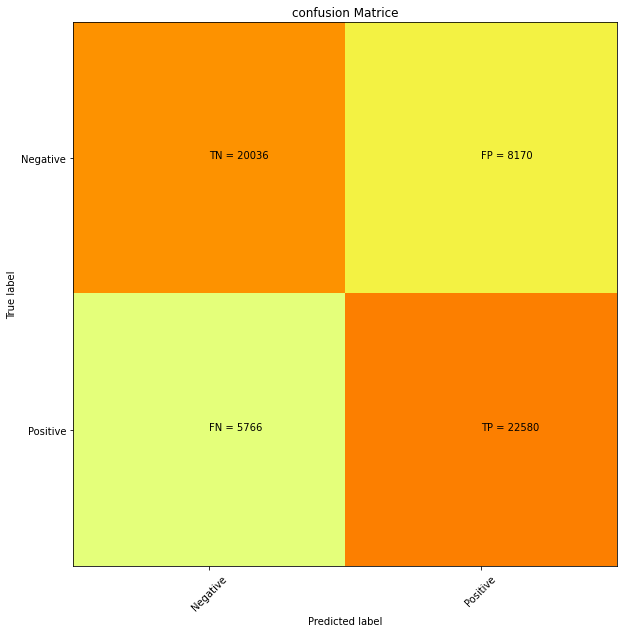

In [26]:
conf_matrix(y_train,y_pred_train)

برای داده های تست نیز مشاهده میشود که دقت 75 درصد و ریکال 79 و پرسیژن 73 درصد است
ماتریس در هم ریختگی نیز تا حد زیادی شبیه داده های آموزش است

test accuracy :
0.7552867953886413
recall test :
0.794399199885698
precision test :
0.7334124785648332


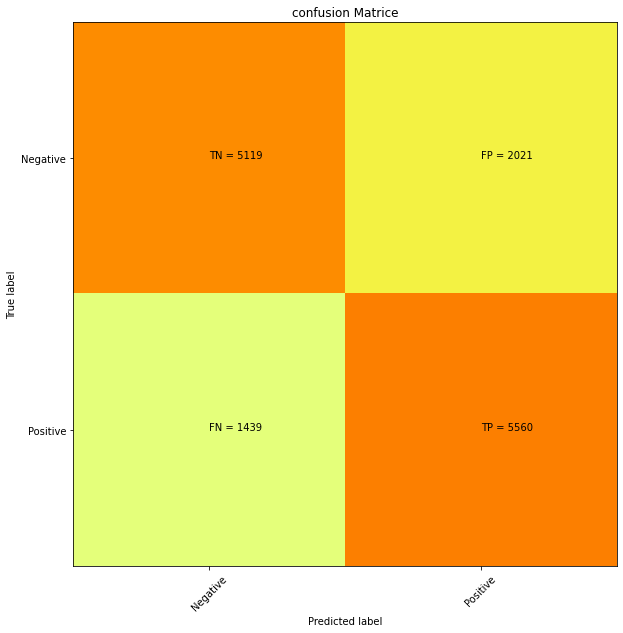

In [27]:
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("test accuracy :")
print(accuracy_test)
print("===========================================")

recall_test = recall_score(y_test, y_pred_test)
print("recall test :")
print(recall_test)
print("===========================================")

precision_test = precision_score(y_test, y_pred_test)
print("precision test :")
print(precision_test)
print("===========================================")

conf_matrix(y_test,y_pred_test)



# Tune Hyperparameter

In [28]:
from sklearn.metrics import roc_auc_score
def my_roc_auc_score(model, X, y): 
  return roc_auc_score(y, model.predict_proba(X)[:,1])


با استفاده از گریدسرچ و پارامترهای گفته شده بهترین پارامترها را به دست می آوریم

In [29]:
from sklearn.model_selection import GridSearchCV
params = [{'learning_rate': [0.02, 0.05, 0.1, 0.3],
         'Max_depth': [2, 3, 4],
         'N_estimator': [100, 200, 300],
         'Colsample_bytree' : [0.8, 1]
         
         }]
kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
model2 = XGBClassifier(Eval_metric="auc" ,Subsample=0.5)
clf = GridSearchCV(estimator = model2, param_grid = params , scoring= my_roc_auc_score , cv=kfold)
clf.fit(X_train , np.ravel(y_train))
cv_results = pd.DataFrame(clf.cv_results_)
clf.best_params_

{'Colsample_bytree': 0.8,
 'Max_depth': 2,
 'N_estimator': 100,
 'learning_rate': 0.1}

مدل را به علت تایم زیاد برای آموزش برای آینده ذخیره میکنیم :)

In [30]:
# save model for later
import pickle
filename = 'tune_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# clf = pickle.load(open(filename, 'rb'))

In [31]:
clf.score(X_train , y_train)

0.8320732424893531

حال مدل دسته بندی خود را با بهترین پارامترها را میسازیم و دوباره روی داده های آموزش فیت میکنیم

In [32]:
model2 = XGBClassifier(learning_rate=0.1 , Max_depth=2 ,N_estimator=100 ,Colsample_bytree=0.8)

In [33]:
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(Colsample_bytree=0.8, Max_depth=2, N_estimator=100)

با استفاده از پارامترهای تنظیم شده کمی دقت افزایش میابد ولی در کل تغییر خیلی محسوسی ایجاد نشده است

0.7541201018531617
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     28206
         1.0       0.73      0.80      0.76     28346

    accuracy                           0.75     56552
   macro avg       0.76      0.75      0.75     56552
weighted avg       0.76      0.75      0.75     56552



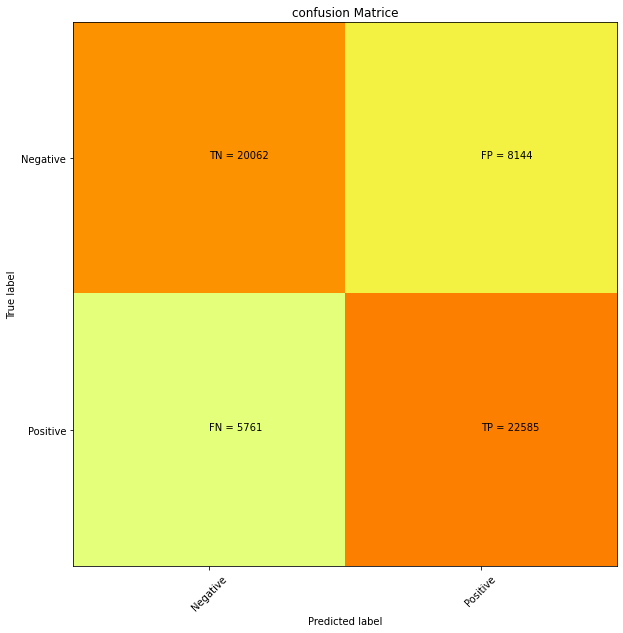

In [34]:
y_pred_train2 = model2.predict(X_train)
accuracy_train2 = accuracy_score(y_train, y_pred_train2)
print(accuracy_train2)
print(classification_report(y_train, y_pred_train2)) 

conf_matrix(y_train, y_pred_train2)

0.7545795317914987
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      7140
         1.0       0.73      0.79      0.76      6999

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



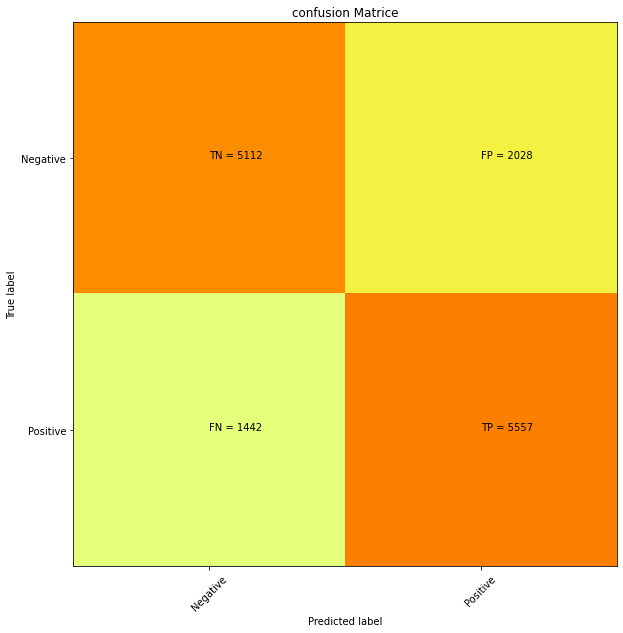

In [35]:
y_pred_test2 = model2.predict(X_test)
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
print(accuracy_test2)
print(classification_report(y_test, y_pred_test2)) 
conf_matrix(y_test, y_pred_test2)

test accuracy :
0.7545795317914987
recall accuracy :
0.7939705672238891
precision accuracy :
0.7326301911667765


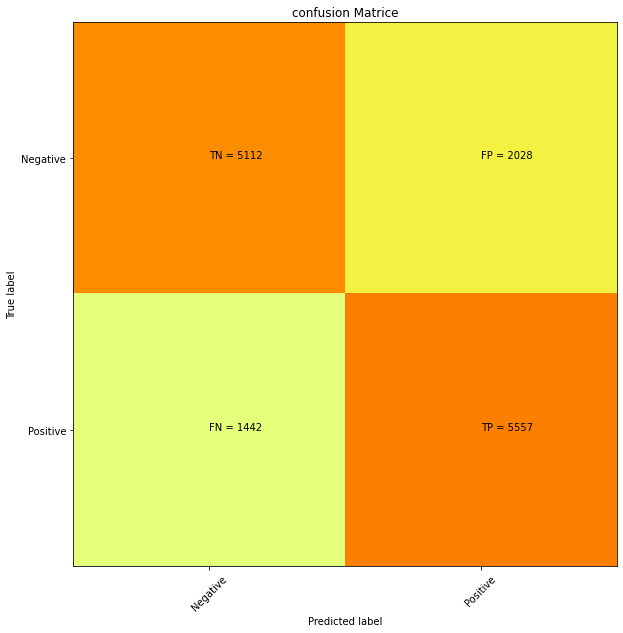

In [36]:
y_pred_test2 = model2.predict(X_test)
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
print("test accuracy :")
print(accuracy_test2)
print("===========================================")

recall_test2 = recall_score(y_test, y_pred_test2)
print("recall accuracy :")
print(recall_test2)
print("===========================================")

precision_test2 = precision_score(y_test, y_pred_test2)
print("precision accuracy :")
print(precision_test2)
print("===========================================")

conf_matrix(y_test,y_pred_test2)

In [37]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Colsample_bytree,param_Max_depth,param_N_estimator,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.139454,0.036950,0.058873,0.000105,0.8,2,100,0.02,"{'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_e...",0.819266,0.818662,0.814271,0.817400,0.002226,55
1,3.151464,0.040019,0.071445,0.005216,0.8,2,100,0.05,"{'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_e...",0.827005,0.827548,0.823534,0.826029,0.001778,37
2,3.127419,0.034077,0.065845,0.000892,0.8,2,100,0.1,"{'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_e...",0.828880,0.829651,0.825875,0.828135,0.001629,1
3,3.065390,0.017149,0.059925,0.001066,0.8,2,100,0.3,"{'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_e...",0.828149,0.828905,0.825614,0.827556,0.001408,19
4,3.109126,0.011939,0.058662,0.000949,0.8,2,200,0.02,"{'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_e...",0.819266,0.818662,0.814271,0.817400,0.002226,55


In [ ]:
clf.param_grid

[{'Colsample_bytree': [0.8, 1],
  'Max_depth': [2, 3, 4],
  'N_estimator': [100, 200, 300],
  'learning_rate': [0.02, 0.05, 0.1, 0.3]}]

# Visualize Results

پس از رسم تاثیر تغییر هر کدام از پارامترها روی عملکرد مدلها مشاهده میشود که بیشترین تاثیر مربوط به لرنینگ ریت بوده است و بقیه تاثیر چندانی نداشته اند

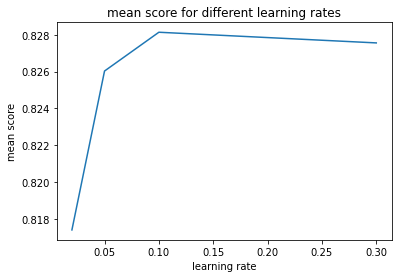

In [38]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
Max_depth = [2, 3, 4]
N_estimator = [100, 200, 300]
Colsample_bytree  = [0.8, 1]

# plot results of learning rate 

best_md=clf.best_params_['Max_depth']
best_cb = clf.best_params_['Colsample_bytree']
best_ns = clf.best_params_['N_estimator']
y = []
for mean_score, params in zip(clf.cv_results_["mean_test_score"], clf.cv_results_["params"]):
    if params["Max_depth"]==best_md and params["Colsample_bytree"]==best_cb and params["N_estimator"]==best_ns :
        
        y.append(mean_score)

plt.plot(learning_rate, y)

plt.title('mean score for different learning rates')
plt.xlabel('learning rate')
plt.ylabel('mean score')
plt.show()


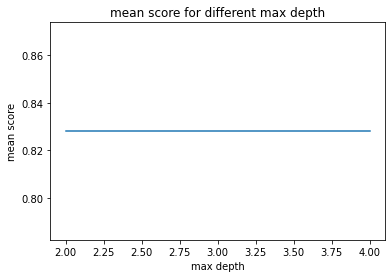

In [39]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
Max_depth = [2, 3, 4]
N_estimator = [100, 200, 300]
Colsample_bytree  = [0.8, 1]

# plot results of max_depth

best_lr=clf.best_params_['learning_rate']
best_cb = clf.best_params_['Colsample_bytree']
best_ns = clf.best_params_['N_estimator']
y = []
for mean_score, params in zip(clf.cv_results_["mean_test_score"], clf.cv_results_["params"]):
    if params["learning_rate"]==best_lr and params["Colsample_bytree"]==best_cb and params["N_estimator"]==best_ns :
        
        y.append(mean_score)

plt.plot(Max_depth, y)

plt.title('mean score for different max depth')
plt.xlabel('max depth')
plt.ylabel('mean score')
plt.show()

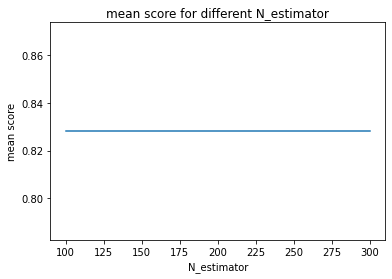

In [40]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
Max_depth = [2, 3, 4]
N_estimator = [100, 200, 300]
Colsample_bytree  = [0.8, 1]

# plot results of max_depth

best_lr=clf.best_params_['learning_rate']
best_cb = clf.best_params_['Colsample_bytree']
best_md = clf.best_params_['Max_depth']
y = []
for mean_score, params in zip(clf.cv_results_["mean_test_score"], clf.cv_results_["params"]):
    if params["learning_rate"]==best_lr and params["Colsample_bytree"]==best_cb and params["Max_depth"]==best_md :
        
        y.append(mean_score)

plt.plot(N_estimator, y)

plt.title('mean score for different N_estimator')
plt.xlabel('N_estimator')
plt.ylabel('mean score')
plt.show()

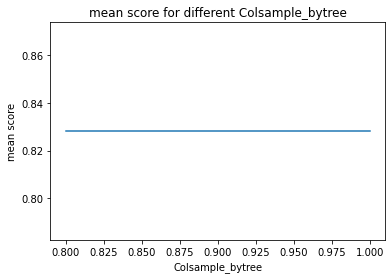

In [41]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
Max_depth = [2, 3, 4]
N_estimator = [100, 200, 300]
Colsample_bytree  = [0.8, 1]

# plot results of max_depth

best_lr=clf.best_params_['learning_rate']
best_ns = clf.best_params_['N_estimator']
best_md = clf.best_params_['Max_depth']
y = []
for mean_score, params in zip(clf.cv_results_["mean_test_score"], clf.cv_results_["params"]):
    if params["learning_rate"]==best_lr and params["N_estimator"]==best_ns and params["Max_depth"]==best_md :
        
        y.append(mean_score)

plt.plot(Colsample_bytree, y)

plt.title('mean score for different Colsample_bytree')
plt.xlabel('Colsample_bytree')
plt.ylabel('mean score')
plt.show()